## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  87.861035  1631.467453  0.298237   6.878469  1.338178
1  60.232342   897.520986  0.116450   3.241380  1.025250
2  28.326569   253.531107  0.371926  10.682578  1.330858
3  88.379677  1346.190768  0.566133   9.414292  1.717359
4   9.418637  1458.355633  0.970647   4.933707  1.661146


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471


0:	learn: 1.0157006	total: 88ms	remaining: 1m 27s
1:	learn: 1.0061447	total: 88.5ms	remaining: 44.2s
2:	learn: 0.9962815	total: 88.9ms	remaining: 29.6s
3:	learn: 0.9860759	total: 89.4ms	remaining: 22.3s
4:	learn: 0.9755382	total: 92.2ms	remaining: 18.4s
5:	learn: 0.9657494	total: 97.9ms	remaining: 16.2s
6:	learn: 0.9541333	total: 98.3ms	remaining: 13.9s
7:	learn: 0.9434319	total: 98.7ms	remaining: 12.2s
8:	learn: 0.9332373	total: 99.7ms	remaining: 11s
9:	learn: 0.9229901	total: 101ms	remaining: 9.96s
10:	learn: 0.9117994	total: 108ms	remaining: 9.73s
11:	learn: 0.9012955	total: 110ms	remaining: 9.05s
12:	learn: 0.8931805	total: 110ms	remaining: 8.38s
13:	learn: 0.8837555	total: 111ms	remaining: 7.81s
14:	learn: 0.8737817	total: 111ms	remaining: 7.31s
15:	learn: 0.8659213	total: 112ms	remaining: 6.89s
16:	learn: 0.8554033	total: 113ms	remaining: 6.54s
17:	learn: 0.8465348	total: 113ms	remaining: 6.19s
18:	learn: 0.8400285	total: 114ms	remaining: 5.88s
19:	learn: 0.8324214	total: 119ms	r

41:	learn: 0.6748486	total: 132ms	remaining: 3s
42:	learn: 0.6681440	total: 133ms	remaining: 2.95s
43:	learn: 0.6616605	total: 133ms	remaining: 2.89s
44:	learn: 0.6565551	total: 134ms	remaining: 2.84s
45:	learn: 0.6511941	total: 135ms	remaining: 2.79s
46:	learn: 0.6446553	total: 135ms	remaining: 2.74s
47:	learn: 0.6372280	total: 136ms	remaining: 2.69s
48:	learn: 0.6319549	total: 136ms	remaining: 2.64s
49:	learn: 0.6263305	total: 137ms	remaining: 2.6s
50:	learn: 0.6213598	total: 137ms	remaining: 2.55s
51:	learn: 0.6160876	total: 138ms	remaining: 2.51s
52:	learn: 0.6104984	total: 138ms	remaining: 2.47s
53:	learn: 0.6042527	total: 139ms	remaining: 2.43s
54:	learn: 0.5986483	total: 139ms	remaining: 2.39s
55:	learn: 0.5937456	total: 140ms	remaining: 2.36s
56:	learn: 0.5880489	total: 140ms	remaining: 2.32s
57:	learn: 0.5828009	total: 141ms	remaining: 2.29s
58:	learn: 0.5791830	total: 141ms	remaining: 2.25s
59:	learn: 0.5743588	total: 142ms	remaining: 2.22s
60:	learn: 0.5698235	total: 142ms	r

233:	learn: 0.2047441	total: 217ms	remaining: 710ms
234:	learn: 0.2036906	total: 218ms	remaining: 709ms
235:	learn: 0.2030634	total: 218ms	remaining: 707ms
236:	learn: 0.2021857	total: 219ms	remaining: 704ms
237:	learn: 0.2011402	total: 219ms	remaining: 701ms
238:	learn: 0.2001194	total: 219ms	remaining: 699ms
239:	learn: 0.1989799	total: 220ms	remaining: 697ms
240:	learn: 0.1979024	total: 220ms	remaining: 694ms
241:	learn: 0.1970135	total: 221ms	remaining: 692ms
242:	learn: 0.1963280	total: 221ms	remaining: 689ms
243:	learn: 0.1956061	total: 222ms	remaining: 687ms
244:	learn: 0.1947795	total: 222ms	remaining: 685ms
245:	learn: 0.1936673	total: 223ms	remaining: 683ms
246:	learn: 0.1930012	total: 223ms	remaining: 680ms
247:	learn: 0.1924048	total: 224ms	remaining: 678ms
248:	learn: 0.1915902	total: 224ms	remaining: 676ms
249:	learn: 0.1904710	total: 224ms	remaining: 673ms
250:	learn: 0.1894361	total: 225ms	remaining: 671ms
251:	learn: 0.1883431	total: 225ms	remaining: 668ms
252:	learn: 

412:	learn: 0.1124621	total: 292ms	remaining: 415ms
413:	learn: 0.1121563	total: 293ms	remaining: 415ms
414:	learn: 0.1119763	total: 294ms	remaining: 414ms
415:	learn: 0.1116780	total: 294ms	remaining: 413ms
416:	learn: 0.1109653	total: 295ms	remaining: 412ms
417:	learn: 0.1108090	total: 295ms	remaining: 411ms
418:	learn: 0.1105201	total: 295ms	remaining: 410ms
419:	learn: 0.1102361	total: 296ms	remaining: 409ms
420:	learn: 0.1101528	total: 296ms	remaining: 407ms
421:	learn: 0.1094610	total: 297ms	remaining: 406ms
422:	learn: 0.1093691	total: 297ms	remaining: 405ms
423:	learn: 0.1086932	total: 297ms	remaining: 404ms
424:	learn: 0.1083841	total: 298ms	remaining: 403ms
425:	learn: 0.1082949	total: 298ms	remaining: 402ms
426:	learn: 0.1082075	total: 299ms	remaining: 401ms
427:	learn: 0.1081219	total: 299ms	remaining: 400ms
428:	learn: 0.1074150	total: 299ms	remaining: 398ms
429:	learn: 0.1067673	total: 300ms	remaining: 397ms
430:	learn: 0.1066807	total: 300ms	remaining: 396ms
431:	learn: 

624:	learn: 0.0586805	total: 378ms	remaining: 227ms
625:	learn: 0.0585527	total: 379ms	remaining: 226ms
626:	learn: 0.0582260	total: 379ms	remaining: 225ms
627:	learn: 0.0580309	total: 380ms	remaining: 225ms
628:	learn: 0.0578287	total: 380ms	remaining: 224ms
629:	learn: 0.0577308	total: 381ms	remaining: 223ms
630:	learn: 0.0575318	total: 381ms	remaining: 223ms
631:	learn: 0.0574355	total: 381ms	remaining: 222ms
632:	learn: 0.0573517	total: 382ms	remaining: 221ms
633:	learn: 0.0573041	total: 382ms	remaining: 221ms
634:	learn: 0.0571086	total: 383ms	remaining: 220ms
635:	learn: 0.0570138	total: 383ms	remaining: 219ms
636:	learn: 0.0569674	total: 383ms	remaining: 218ms
637:	learn: 0.0567754	total: 384ms	remaining: 218ms
638:	learn: 0.0566834	total: 384ms	remaining: 217ms
639:	learn: 0.0565609	total: 384ms	remaining: 216ms
640:	learn: 0.0565159	total: 385ms	remaining: 215ms
641:	learn: 0.0562012	total: 385ms	remaining: 215ms
642:	learn: 0.0561076	total: 386ms	remaining: 214ms
643:	learn: 

813:	learn: 0.0384599	total: 454ms	remaining: 104ms
814:	learn: 0.0383833	total: 454ms	remaining: 103ms
815:	learn: 0.0382844	total: 454ms	remaining: 102ms
816:	learn: 0.0381085	total: 455ms	remaining: 102ms
817:	learn: 0.0380492	total: 455ms	remaining: 101ms
818:	learn: 0.0380365	total: 456ms	remaining: 101ms
819:	learn: 0.0378656	total: 456ms	remaining: 100ms
820:	learn: 0.0377847	total: 456ms	remaining: 99.5ms
821:	learn: 0.0376893	total: 457ms	remaining: 98.9ms
822:	learn: 0.0375649	total: 457ms	remaining: 98.3ms
823:	learn: 0.0374711	total: 458ms	remaining: 97.8ms
824:	learn: 0.0374007	total: 458ms	remaining: 97.2ms
825:	learn: 0.0373228	total: 458ms	remaining: 96.6ms
826:	learn: 0.0372702	total: 459ms	remaining: 96ms
827:	learn: 0.0372581	total: 459ms	remaining: 95.4ms
828:	learn: 0.0372064	total: 460ms	remaining: 94.8ms
829:	learn: 0.0371606	total: 460ms	remaining: 94.2ms
830:	learn: 0.0370921	total: 460ms	remaining: 93.6ms
831:	learn: 0.0369648	total: 461ms	remaining: 93ms
832:

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.3802455292235311


ABC Pre-generator MAE 0.35646496024080826


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

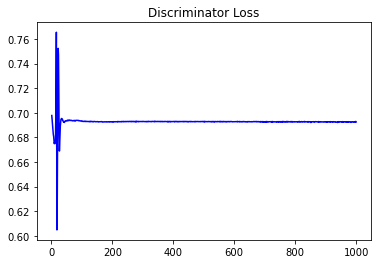

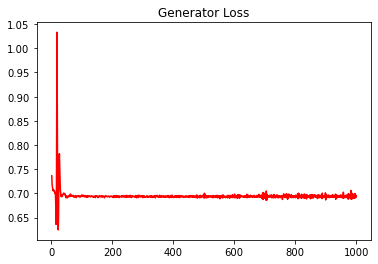

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.34605399693083017


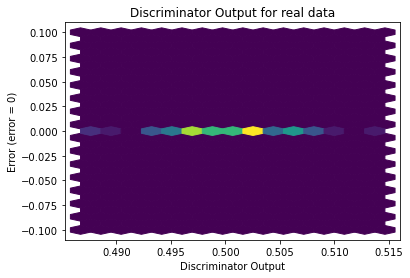

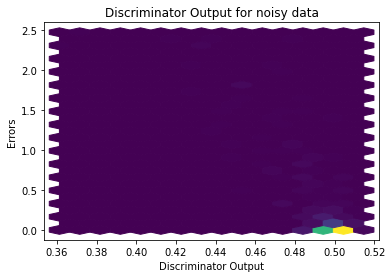

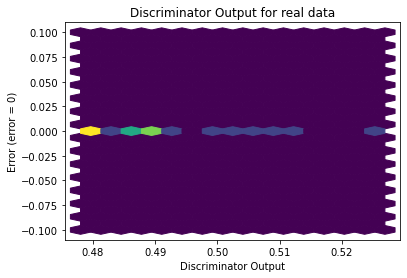

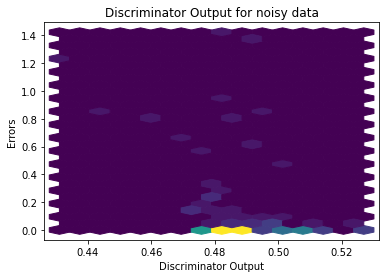

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

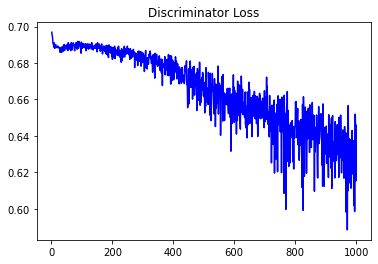

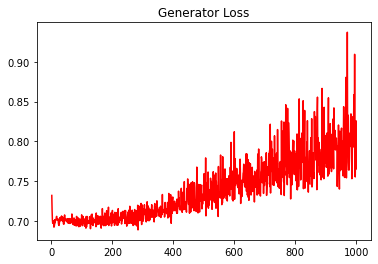

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.42739027079567316


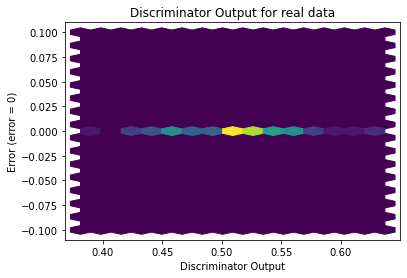

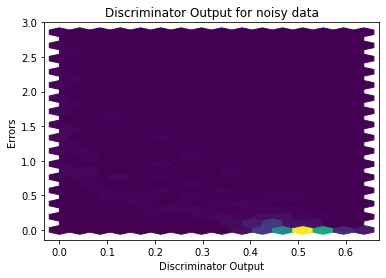

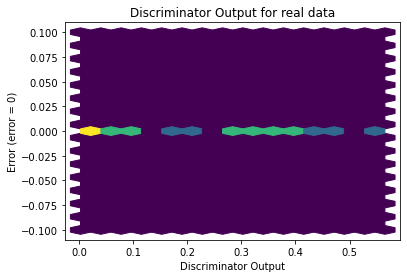

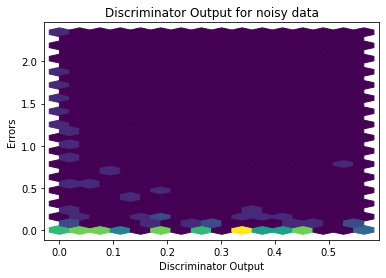

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


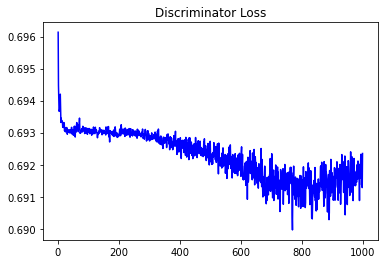

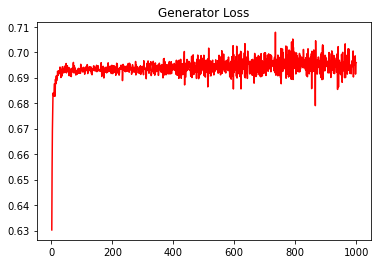

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.3953956582117826


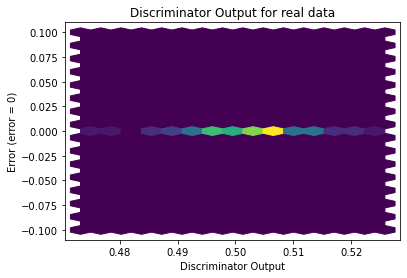

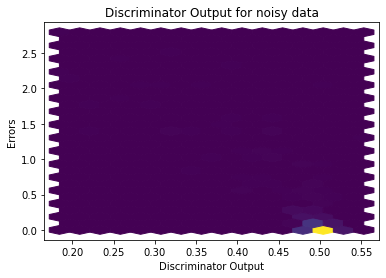

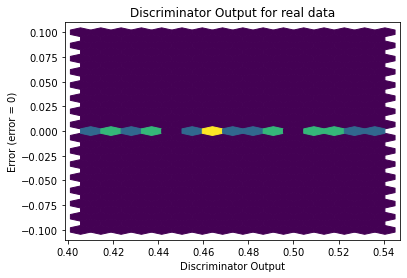

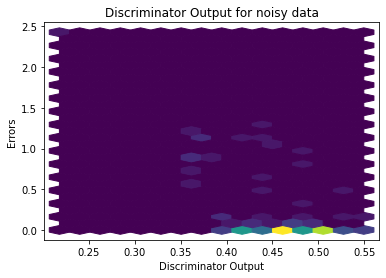

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


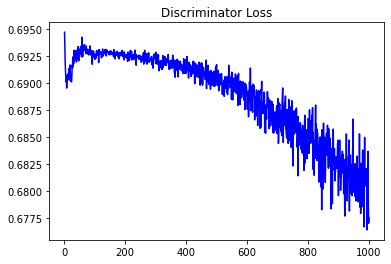

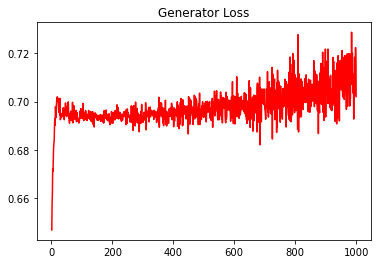

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.38954791769234


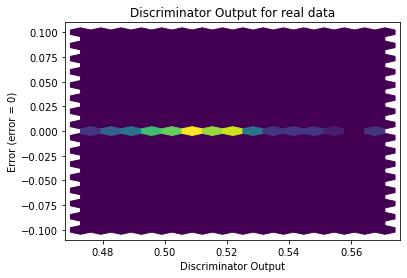

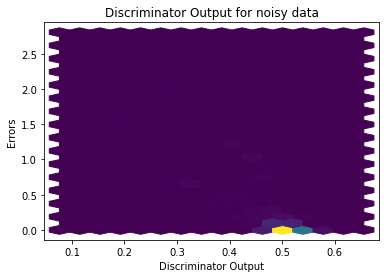

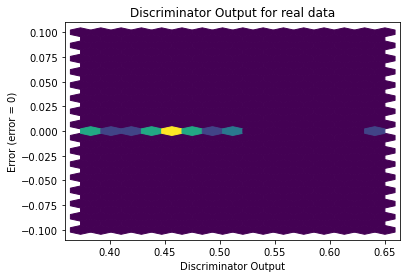

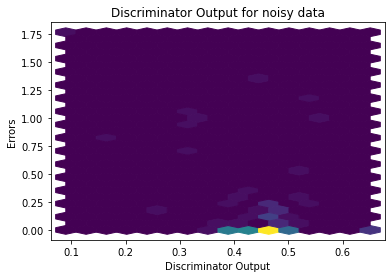

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1857]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0445]], requires_grad=True)
